# Project : Wrangle and Analyze WeRateDogs Twitter data

## Introduction:

Wrangle, analyze and visualize the tweet archive of Twitter user [`@dog_rates`](https://twitter.com/dog_rates), also known as [**WeRateDogs**](https://en.wikipedia.org/wiki/WeRateDogs) to create interesting and trustworthy analyses and visualizations.

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 and the numerators almost always greater than 10 (Ex: 11/10, 12/10, 13/10, etc.) because they are good dogs. WeRateDogs has over 8 million followers and has received international media coverage.

## Project Tasks:

- Data wrangling, which consists of:
    1. Gathering data
    2. Assessing data
    3. Cleaning data
- Storing Cleaned Data
- Analyzing and visualizing the wrangled data
- Reporting on 1) the data wrangling efforts and 2) data analyses and visualizations

## Data Wrangling

In [2]:
# Importing required modules and packages
import pandas as pd
import requests
import tweepy
import json
from timeit import default_timer as timer
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Adding matplotlib inline to show plots in notebook 
%matplotlib inline

### Gathering Data

For this project, gather following three datasets:
1. Enhanced Twitter Archive from "twitter-archive-enhanced.csv" file.
2. Image Predictions File "image_predictions.tsv" which is hosted on [Udacity’s server]( https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).
3. Additional Data by querying Twitter API 

#### 1. Enhanced Twitter Archive from "twitter-archive-enhanced.csv" file.

In [3]:
# Reading the csv file contents into dataframe
df_tae = pd.read_csv('twitter-archive-enhanced.csv')
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Image Predictions File "image_predictions.tsv" which is hosted on Udacity’s server.

Programmatically download "image_predictions.tsv" using the Requests library and the following URL:

url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
# Create a tsv file with the name 'image_predictions.tsv' to save the response contents form given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image_predictions.tsv', mode='wb') as file:
    response = requests.get(url)
    file.write(response.content)

In [5]:
# Import the response contents into a DataFrame
df_ip = pd.read_csv('image_predictions.tsv', sep = "\t")
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional Data by querying Twitter API 

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file.

In [6]:
# Create an API object that can be used to gather Twitter data.
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tae.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [115]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive i.e df_tae

# Set timer 
start = timer()

# Save each tweet's returned JSON as a new line in a tweet_json.txt file

with open('tweet_json.txt ', 'w') as file:
    for tweet_id in tweet_ids:
        print(tweet_id)
        try: 
            tweet = api.get_status(tweet_id, 
                                   tweet_mode = 'extended',
                                   wait_on_rate_limit = True,
                                   wait_on_rate_limit_notify= True)
            # Write tweet JSON to txt file
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            print(tweet_id, "Does not exist")
            pass

end = timer()
print(end-start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888202515573088257 Does not exist
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
8826272703216025

824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543

769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850

Rate limit reached. Sleeping for: 672


758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368
754011816964026368 Does not exist
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
7519500173222461

705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345

678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345


Rate limit reached. Sleeping for: 670


676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471

668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915

In [8]:
# Read tweet_json.txt file line by line to create a pandas DataFrame
tj_list= []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tj_list.append({'tweet_id': tweet['id_str'], 
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count']})
df_tj= pd.DataFrame(tj_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tj.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7678,36064
1,892177421306343426,5678,31106
2,891815181378084864,3763,23421
3,891689557279858688,7851,39338
4,891327558926688256,8449,37583


### Assessing Data

Assessing data in following dataframes visually and programmatically for quality and tidiness issues:
- df_tae(twitter archive enhanced data)
- df_ip(image prediction data)
- df_tj(additional twitter json data)

In [11]:
# Display the df_tae contents
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# Print information
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Print summary statistics
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Check the rating columns
df_tae.groupby(['rating_numerator','rating_denominator']).count()['tweet_id']

rating_numerator  rating_denominator
0                 10                      2
1                 2                       1
                  10                      8
2                 10                      9
3                 10                     19
4                 10                     15
                  20                      2
5                 10                     37
6                 10                     32
7                 10                     54
                  11                      1
8                 10                    102
9                 10                    156
                  11                      2
10                10                    461
11                10                    463
                  15                      1
12                10                    558
13                10                    351
14                10                     54
15                10                      2
17                10                   

In [15]:
# Check different values in text column
df_tae.text.value_counts()

This is Sugar. She excels underwater. 12/10 photogenic af https://t.co/AWMeXJJz64                                                                                        1
This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz                                 1
RT @dog_rates: This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https…                             1
This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI                              1
Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu                                                       1
                                                                                                                                                 

In [78]:
# For visual analysis,
# Save text and rating_numerator for rows where rating_denominator is 10, sorted by rating_numerator
df_temp = df_tae.query('rating_denominator == 10')[['text', 'rating_numerator']].sort_values('rating_numerator')
df_temp.to_csv('text_rating_d_10.csv', index = False)
df_temp

,text,rating_numerator
315,When you're so blinded by your systematic plag...,0
1016,"PUPDATE: can't see any. Even if I could, I cou...",0
2338,Not familiar with this breed. No tail (weird)....,1
2038,After 22 minutes of careful deliberation this ...,1
2261,Never seen dog like this. Breathes heavy. Tilt...,1
...,...,...
290,@markhoppus 182/10,182
188,@dhmontgomery We also gave snoop dogg a 420/10...,420
2074,After so many requests... here you go.\n\nGood...,420
189,@s8n You tried very hard to portray this good ...,666


In [79]:
# For visual analysis,
# Save text and rating_numerator for rows where rating_denominator is not 10, sorted by rating_numerator
df_temp = df_tae.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']].sort_values('rating_numerator')
df_temp.to_csv('text_rating_d_not10.csv', index = False)
df_temp

,text,rating_numerator,rating_denominator
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2
1598,Yes I do realize a rating of 4/20 would've bee...,4,20
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11
784,"RT @dog_rates: After so many requests, this is...",9,11
1068,"After so many requests, this is Bretagne. She ...",9,11
342,@docmisterio account started on 11/15/15,11,15
1663,"I'm aware that I could've said 20/16, but here...",20,16
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
1433,Happy Wednesday here's a bucket of pups. 44/40...,44,40


In [20]:
# Check different values in name column
df_tae.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Gunner       1
Skittle      1
Beckham      1
Joey         1
Jackie       1
Name: name, Length: 957, dtype: int64

In [21]:
# check the names with 1 or 2 letters
df_tae[df_tae.name.str.len()<= 2]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [18]:
# Check all lower case names
df_tae[df_tae.name == df_tae.name.str.lower()]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
actually         2
mad              2
not              2
such             1
his              1
life             1
unacceptable     1
space            1
infuriating      1
by               1
all              1
officially       1
old              1
my               1
this             1
light            1
incredibly       1
Name: name, dtype: int64

In [22]:
# Check all upper case names
df_tae[df_tae.name == df_tae.name.str.upper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [23]:
# Check rows with non NUll values in in_reply_to_status_id and in_reply_to_user_id 
df_tae[df_tae.in_reply_to_status_id > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [24]:
# Check for duplicates
df_tae.duplicated().sum()

0

In [25]:
# Check for duplicates in tweet_id column
df_tae.tweet_id.duplicated().sum()

0

In [26]:
# Display the df_ip contents
df_ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
# Print information
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# Print summary statistics
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
# Check for duplicates
df_ip.duplicated().sum()

0

In [30]:
# Check for duplicate tweet_ids
df_ip.tweet_id.duplicated().sum()

0

In [31]:
# Display the df_tj contents
df_tj

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7678,36064
1,892177421306343426,5678,31106
2,891815181378084864,3763,23421
3,891689557279858688,7851,39338
4,891327558926688256,8449,37583
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,131,271
2328,666033412701032449,41,112
2329,666029285002620928,42,121


In [32]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [33]:
# Check for duplicates
df_tj.duplicated().sum()

0

In [34]:
# Check for duplicate tweet_ids
df_tj.tweet_id.duplicated().sum()

0

### Quality

##### `df_tae`:
1. Columns for dog stages (doggo, floofer,	pupper,	puppo) use string "None" to represent Null
2. Retweet data in columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp represents retweets 
3. Erroneous datatype for "timestamp" column
4. "tweet_id" column datatype is int
5. Missing 2278 records in columns in_reply_to_status_id and in_reply_to_user_id
6. Erroneous datatypes for columns in_reply_to_status_id and in_reply_to_user_id
7. Html tags in "source" column
8. Rating for tweet_id(835246439529840000) should be 13/10
9. Invalid rating numerator and denominator pair values (like 24/7, 1/2, 9/11, 4/20, 7/11, 11/15, 20/16 etc.) Denominator should be always 10 as per WeRateDogs rating system.
10. Some rating have decimal values in text which was misinterpreted in ratings_numerator column. (Ex: "This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948", here rating_numerator is 5 instead of 13.5). (This could be because of rating extraction using "\d+/\d+" in the text)
10. Column "name" uses string "None" to represent Null
11. Inaccurate names in "name" column (like "by", "an", "a", "the"), all lower case names are inaccurate.
12. Inaccurate name O for O'Malley for tweet_id (776201521193218049)


##### `df_ip`:

1. Missing 281 records compared to df_tae. This is because some tweets have posted videos not images.
2. "tweet_id" column datatype is int

##### `df_tj`:

1. Missing 25 records compare to df_tae. This could be because the tweets have been deleted from the twitter account.

### Tidiness

##### `df_tae`:

- One variable "dog_stage" in four columns (doggo, floofer,	pupper,	puppo)  

##### `df_ip`:

- Many columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) are used to give information about one variable dog_breed
- Same tweet_ids related data stored in two tables `df_tae` and `df_ip` instead of one table

##### `df_tj`:

- Same tweet_ids related data stored in two tables `df_tae` and `df_tj` instead of one table

### Cleaning Data

Fixing the quality and tidiness issues identified in the assessment step. 

In [35]:
# Make copy of original datasets before making any changes
df_tae_clean = df_tae.copy()
df_ip_clean = df_ip.copy()
df_tj_clean = df_tj.copy()

#### Missing Data

#### `df_tae`: Missing 2278 records in columns in_reply_to_status_id and in_reply_to_user_id

##### Define

There are lot of missing values in these columns as each tweet not necessarily have these two parameters. These parameters are not required for analyzing WeRateDogs data. Hence, drop these columns.

##### Code

In [36]:
df_tae_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis= 1, inplace=True)

##### Test

In [37]:
# Check if above columns are delected
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### `df_ip`: Missing 281 records compared to df_tae. 

This is because some tweets have posted videos not images. Hence, it is not possible to gather related data.

#### `df_tj`: Missing 25 records compare to df_tae. 

Twitter archive data in df_tae is 3 years old. Some of the tweets from this dataset might have been deleted from twitter. Hence, there records are missing in recently queried data in df_tj. It is not possible to gather these records.

#### Tidiness

#### `df_tae`: One variable "dog_stage" in four columns (doggo, floofer,	pupper,	puppo)

##### Define

Create a single column **"dog_stage"** to represent one of the four stages of dogs doggo, floofer, pupper and puppo, using their respective columns (doggo, floofer, pupper and puppo) and pandas apply(). Then drop columns (doggo, floofer, pupper and puppo).

##### Code

In [38]:
# Create a single column "dog_stage" using apply() 
df_tae_clean['dog_stage'] = df_tae_clean.apply(lambda x: x['doggo'] if x['doggo'] == 'doggo' 
                                     else (x['floofer'] if x['floofer'] == 'floofer'
                                          else (x['pupper'] if x['pupper'] == 'pupper'
                                               else(x['puppo'] if x['puppo'] == 'puppo'
                                                   else np.nan))), axis = 1)

# Drop columns (doggo, floofer, pupper and puppo)
df_tae_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace =True)

##### Test

In [39]:
# Check dog_stage column
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')

In [40]:
# Check values in dog_satge column
df_tae_clean.dog_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

#### `df_ip`: Many columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) are used to give information about one variable dog_breed

##### Define

Create a column **"dog_breed"** for predicted dog breed, based on the confidence coefficient and prediction status(True or False) for all 3 given image predictions using apply(). Then drop columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog). As p1 is the top most prediction, use it first then use p2 and finally use p3.

From summary statistics of df_ip table, the max values of p1_Conf, p2_Conf, p3_Conf are 1.0, 0.488, 0.2732 respectively. And for all rows in df_ip p1_Conf > p2_Conf > p3_conf. Hence, choosing overall confidence level 0.2 for all three cases.



##### Code

In [41]:
# Confident level
cl = 0.2

# Create dog_breed column using apply()
df_ip_clean['dog_breed'] = df_ip_clean.apply(lambda x: x['p1'] if x['p1_dog'] == True and x['p1_conf']> cl 
            else (x['p2'] if x['p2_dog'] == True and x['p2_conf']> cl 
                  else(x['p3'] if x['p3_dog'] == True and x['p3_conf']> cl 
                       else np.nan)), axis = 1)

# Drop columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)
df_ip_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

##### Test

In [42]:
# Check all columns
df_ip_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


#### `df_ip`: Same tweet_ids related data stored in two tables `df_tae` and `df_ip` instead of one table

##### Define

df_ip should be part of df_tae. Join df_tae_clean and df_ip_clean on tweet_id column using pandas merge().

##### Code

In [43]:
# Merge df_tae_clean and df_ip_clean on tweet_id
df_tae_clean = df_tae_clean.merge(df_ip_clean, how= 'left',  on=['tweet_id'])

##### Test

In [44]:
# Check if tables merged properly
df_tae_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset


In [45]:
# Check shape of combined dataset
df_tae_clean.shape

(2356, 15)

#### `df_tj`:  Same tweet_ids related data stored in two tables `df_tae` and `df_tj` instead of one table

#### `df_tae` and `df_ip`: "tweet_id" column datatype is int

##### Define

df_tj contains data related to tweet_ids in df_tae. Hence, join them on tweet_id using pandas merge(). 

Before merging we need to check the datatype for tweet_id column in both tables. Datatype for tweet_id in df_tae, df_ip is int and in df_tj it is string/object. As df_ip is merged in df_tae we don't need to change anything in it. Change datatype of df_tae to string/object.

##### Code

In [46]:
# Change datatype of tweet_id column in df_tae to string
df_tae_clean.tweet_id = df_tae_clean.tweet_id.astype(str)

# Merge df_tae_clean and df_tj_clean on tweet_id column
df_tae_clean = df_tae_clean.merge(df_tj_clean, how= 'left',  on=['tweet_id']) 

##### Test

In [47]:
# Check if tables merged properly
df_tae_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,7678.0,36064.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5678.0,31106.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,3763.0,23421.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,7851.0,39338.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,8449.0,37583.0


In [48]:
# Check shape of combined dataset
df_tae_clean.shape

(2356, 17)

In [49]:
# Check if tweed_id datatype is object
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  dog_stage                   380 non-null    object 
 12  jpg_url                     2075 non-null   object 
 13  img_num                     2075 

#### Quality

#### `df_tae`: Retweet data in columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp represents retweets

##### Define

Retweet data in some tweet rows indicates that these tweets are actually retweets. For this project, retweets are not required. Hence, delete all tweet records with non null values in these columns and then drop these columns.

##### Code

In [50]:
# Remove rows with non null values in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

# Save list of indices for all retweets
rt_list =[]
rt_list = df_tae_clean[df_tae_clean.retweeted_status_id.notnull()].index.values

# drop all rewteets using 
df_tae_clean.drop(rt_list, axis = 0, inplace= True)

# drop columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
df_tae_clean.drop(['retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'], axis =1, inplace = True)

##### Test

In [51]:
# Check if 181 retweet rows are deleted
df_tae_clean.shape

(2175, 14)

In [52]:
# Check if retweet columns are deleted
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'dog_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

#### `df_tae`: Erroneous datatype for "timestamp" column

##### Define

Change datatype of column timestamp to datetime using to_datetime().

##### Code

In [53]:
df_tae_clean.timestamp = pd.to_datetime(df_tae_clean.timestamp)

##### Test

In [54]:
# Check datatype for timestamp column
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_stage           344 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  dog_breed           1416 non-null   object             
 12  retweet_count       2168 non-null 

#### `df_tae`: Html tags in "source" column

##### Define

Source urls are surronded in html tags. Extract these urls using string split() function.

##### Code

In [55]:
# Split source string to separate the source url from tag
df_source = df_tae_clean.source.str.split('"', expand = True)
df_source

,0,1,2,3,4
0,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
1,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
3,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
4,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
...,...,...,...,...,...
2351,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2352,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2353,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2354,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>


In [56]:
# Save the urls only in source column
df_tae_clean.source = df_source[1]

##### Test

In [57]:
# Check if html tags are removed from source column values
df_tae_clean.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

#### `df_tae`: Rating for tweet_id(835246439529840000) should be 13/10

This record was retweet. Hence, it is removed from df_tae.

#### `df_tae`: Invalid rating numerator and denominator pair values (like 24/7, 1/2, 9/11, 4/20, 7/11, 11/15, 20/16 etc.)

##### Define

For rating a dog's images, Denominator should be 10 as per WeRateDogs rating system. But, in some rare cases when there are multiple dogs in one image they have given ratings like 80/80 or 60/50. For this project, I will ignore these few ratings and consider them invalid.

Delete all the ratings with denominator other than 10 (like 24/7, 1/2, 9/11, 4/20, 7/11, 11/15, 20/16 etc.)

##### Code

In [58]:
# Remove denominator values(other than 10) for all invalid ratings 
df_tae_clean.rating_denominator =  df_tae_clean.rating_denominator.apply(lambda x: x if x == 10 else np.nan)

# Remove numerators values for all invalid ratings
df_tae_clean.rating_numerator = df_tae_clean.apply(lambda x: x['rating_numerator'] if x['rating_denominator'] == 10 
                                                   else np.nan, axis =1)

##### Test

In [59]:
# Check rating_denominator coulmn value_counts
df_tae_clean.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

In [60]:
# Check if all invalid ratings are removed
df_tae_clean.groupby(['rating_numerator','rating_denominator']).count()['tweet_id']

rating_numerator  rating_denominator
0.0               10.0                    2
1.0               10.0                    7
2.0               10.0                    9
3.0               10.0                   19
4.0               10.0                   15
5.0               10.0                   36
6.0               10.0                   32
7.0               10.0                   53
8.0               10.0                   98
9.0               10.0                  155
10.0              10.0                  442
11.0              10.0                  425
12.0              10.0                  500
13.0              10.0                  307
14.0              10.0                   43
15.0              10.0                    1
17.0              10.0                    1
26.0              10.0                    1
27.0              10.0                    1
75.0              10.0                    1
182.0             10.0                    1
420.0             10.0                 

#### `df_tae`: Some ratings have decimal values in text which was misinterpreted in ratings_numerator column. (Ex: "This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948") Here, rating_numerator is 5 instead of 13.5.

##### Define

This error might have happen because of rating extraction from text field using regular expression "\d+/\d+".

To solve this issue, extract all the instances of decimal point ratings from the text column using regex search() and then replace the erroneous ratings with these new ratings. 

##### Code

In [61]:
# Extract all the instances of decimal point ratings from the text column using regex search()
# Save index of all rows with erroneous ratings in idex_list
index_list =[]
for i, text in df_tae_clean['text'].iteritems():
    if re.search(r'\d+\.\d+\/\d+', text):
        print(i, text)
        print(re.search(r'\d+\.\d+\/\d+', text).group().split("/")[0])
        index_list.append(i)
        
        # Replace the erroneous ratings with correct decimal value
        df_tae_clean.loc[i,'rating_numerator'] = float(re.search(r'\d+\.\d+\/\d+', text).group().split("/")[0])

45 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
13.5
695 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
9.75
763 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
11.27
1689 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
9.5
1712 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
11.26


##### Test

In [62]:
# Check if all erroneous rating_numerator values are updated using index_list
df_tae_clean.loc[index_list]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
45,883482846933004288,2017-07-08 00:28:19+00:00,http://twitter.com/download/iphone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,8984.0,42807.0
695,786709082849828864,2016-10-13 23:23:56+00:00,http://twitter.com/download/iphone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,Pomeranian,6220.0,18516.0
763,778027034220126208,2016-09-20 00:24:34+00:00,http://twitter.com/download/iphone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,1634.0,6616.0
1689,681340665377193984,2015-12-28 05:07:27+00:00,http://twitter.com/download/iphone,I've been told there's a slight possibility he...,NaN,9.50,10.0,None,NaN,NaN,NaN,NaN,275.0,1634.0
1712,680494726643068929,2015-12-25 21:06:00+00:00,http://twitter.com/download/iphone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,481.0,1704.0


#### `df_tae`: Column "name" uses string "None" to represent Null

##### Define

Replace string "None" with null values using numpy.nan.

##### Code

In [63]:
# Replace "None" with null
df_tae_clean.name = df_tae_clean.name.replace('None',np.nan)

##### Test

In [64]:
# Check if None is replaced
df_tae_clean[df_tae_clean.name == "None"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count


#### `df_tae`: Inaccurate names in "name" column (like "by", "an", "a", "the"), all lower case names are inaccurate.

##### Define

Remove all inaccurate lower case names in name column. 

##### Code

In [65]:
# Save all lower case names in l_list
l_list = []
l_list = df_tae_clean[df_tae_clean.name == df_tae_clean.name.str.lower()]['name'].unique()

# Replace inaccurate names in l_list with null
df_tae_clean.name = df_tae_clean.name.replace(l_list, np.nan)

##### Test

In [66]:
# Check if all inaccurate lower case names are remved
df_tae_clean[df_tae_clean.name == df_tae_clean.name.str.lower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count


#### `df_tae`: Inaccurate name O for O'Malley for tweet_id (776201521193218049)

##### Define

Replace name "O" with "O'Malley" for tweet_id (776201521193218049). There is just one "O" in name column.

##### Code

In [67]:
# Replace name "O" with "O'Malley"
df_tae_clean.name = df_tae_clean.name.replace("O", "O'Malley")

##### Test

In [68]:
# Check name for tweet_id 776201521193218049, should be "O'Malley"
df_tae_clean[df_tae_clean.tweet_id == "776201521193218049"]['name']

775    O'Malley
Name: name, dtype: object

## Storing Cleaned Data

Store cleaned and combined data in master dataset 'twitter_archive_master.csv'.

In [69]:
df_tae_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and visualizing the wrangled data

In [70]:
df = pd.read_csv('twitter_archive_master.csv', parse_dates =['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2153 non-null   float64            
 6   rating_denominator  2153 non-null   float64            
 7   name                1391 non-null   object             
 8   dog_stage           344 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  dog_breed           1416 non-null   object             
 12  retweet_count       2168 non-null 

In [71]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,7678.0,36064.0
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,5678.0,31106.0
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,3763.0,23421.0
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,7851.0,39338.0
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,8449.0,37583.0


In [72]:
# Setting up background style for plots
sns.set_style("darkgrid")

### 1. Rating trends of WeRateDogs over the time period

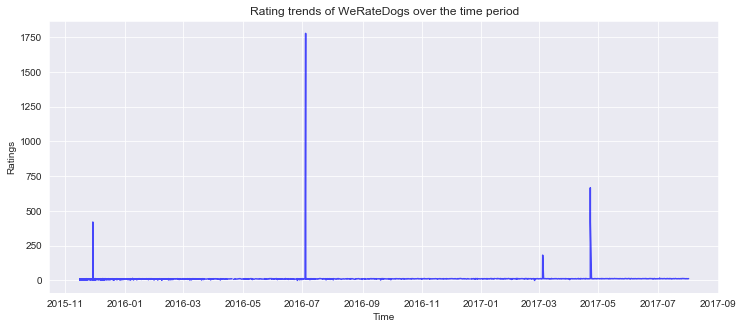

In [73]:
# Creating sub-plot for line chart
plt.subplots(figsize=(12,5))
# Plotting line chart
plt.plot(df.groupby(['timestamp'])['rating_numerator'].mean(), color='b', alpha=.7);
# x-axis label
plt.xlabel("Time")
# y-axis label
plt.ylabel("Ratings")
# Title of the bar chart
plt.title("Rating trends of WeRateDogs over the time period");

Above plot indicates that there are outliers in rating_numerator column.

In [74]:
# Check for outliers
df.rating_numerator.value_counts().sort_index()

0.00         2
1.00         7
2.00         9
3.00        19
4.00        15
5.00        34
6.00        32
7.00        53
8.00        98
9.00       155
9.50         1
9.75         1
10.00      442
11.00      425
11.26        1
11.27        1
12.00      500
13.00      307
13.50        1
14.00       43
15.00        1
17.00        1
182.00       1
420.00       2
666.00       1
1776.00      1
Name: rating_numerator, dtype: int64

Last four ratings in above series are few extreme values the dataset. These are the outliers. I am limiting y-axis values to remove outliers from the plot.

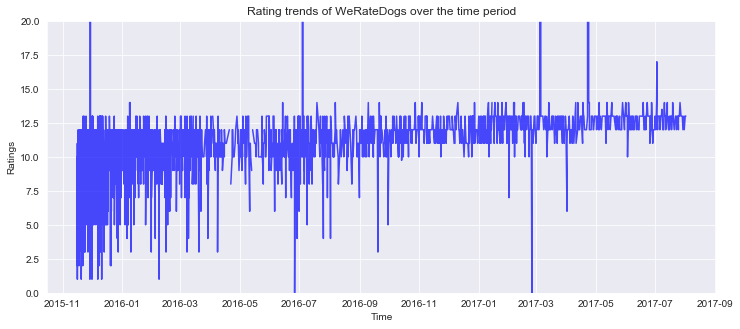

In [75]:
# Creating sub-plot for line chart
plt.subplots(figsize=(12,5))
# Plotting line chart
plt.plot(df.groupby(['timestamp'])['rating_numerator'].mean(), color='b', alpha=.7);
# Limiting y-axis values to remove outliers
plt.ylim(0, 20)
# x-axis label
plt.xlabel("Time")
# y-axis label
plt.ylabel("Ratings")
# Title of plot
plt.title("Rating trends of WeRateDogs over the time period");

### 2. Top 10 highly rated dog breeds by WeRateDogs.

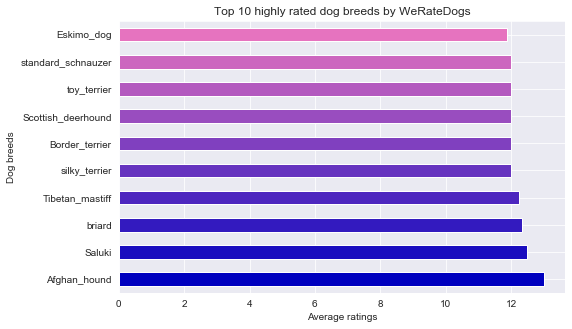

In [76]:
# Extract top 10 highly rated dog_breeds
top10_breeds = df.groupby(['dog_breed'])['rating_numerator'].mean().sort_values(ascending = False).head(10)

# Create simple gradient of colors
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(top10_breeds))]

# Creating sub-plot for line chart
plt.subplots(figsize=(8,5))

# Plot horizontal bar chart
(top10_breeds).plot(kind='barh', color = my_colors);

# x-axis label
plt.xlabel("Average ratings")
# y-axis label
plt.ylabel("Dog breeds")
# Title of the bar chart
plt.title("Top 10 highly rated dog breeds by WeRateDogs");

### 3. Do tweets of high rated dogs get more favorite counts?

To find answer for above question, plot a scatter plot between rating_numerator and favorite_count.

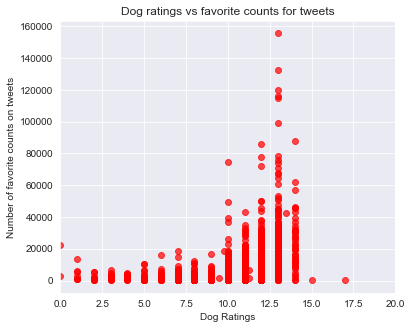

In [77]:
# Creating sub-plot for scatter plot
plt.subplots(figsize=(6,5))

# Plot scatter plot
plt.scatter(df['rating_numerator'], df['favorite_count'], color='r', alpha =0.7);

# Limiting x-axis values to avoid outliers
plt.xlim(0, 20)

# x-axis label
plt.xlabel("Dog Ratings")
# y-axis label
plt.ylabel("Number of favorite counts on tweets")
# Title of the bar chart
plt.title("Dog ratings vs favorite counts for tweets");

From above scatter plot, we can say that the parameters rating_numerator and favorite_count are positively correlated. Hence, in general tweets with high rated dogs get more favorite counts.

## Limitations:

1. The insights drawn from analyzing 'twitter_archive_master.csv' dataset are strictly based on the observations made by cleaning and visualizing different characteristics of this dataset. Any inferential statistical methods are not used to make the inferences or conclusions. 

2. Many parameter values in this dataset are missing which might have affected the analysis results.

3. For rating a dog's images, Denominator should be 10 as per WeRateDogs rating system. But, in some rare cases when there were multiple dogs in one image they have given ratings like 80/80(for 8 dogs) or 60/50(for 5 dogs). For this project, I have ignored these few ratings and consider them invalid.

4. There could be still be some inaccurate values in dataset based on the extraction techniques used to form twitter archive dataset.

5. The dog_breed column is derived from given image prediction data. Hence, this data depends on the accuracy of predicting algorithm.

6. To form this master dataset, I have combined data from three different tables, but some records were missing in two datasets. 


## Resources:

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/

https://stackoverflow.com/questions/44991438/lambda-including-if-elif-else

https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors